## Experiments: Comparing RSAST with other methods

In [2]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram']

In [3]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
hyperparameter='ACF&PACF: n_random_points=10 nb_inst_per_class=10'

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


### Reading Datasets

In [4]:

# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]+"_UCR_RES_0"
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [5]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/UCR_ARCHIVE_singleTrainTest_ALL_METHODS.csv'

df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_UCR_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [6]:
# Set directory where the csv files are located
"""
filepath = os.getcwd()+'/ResultsSummarized/UCR_ARCHIVE_100RESAMPLES_ALL_METHODS.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_UCR_AVG_100RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
"""

'\nfilepath = os.getcwd()+\'/ResultsSummarized/UCR_ARCHIVE_100RESAMPLES_ALL_METHODS.csv\'\ndf = pd.read_csv(filepath)\ndf = df.melt(id_vars=["Unnamed: 0"], \n        var_name="method", \n        value_name="score")\ndf = df.rename(columns={\'Unnamed: 0\':\'dataset\'})\ndf[\'method\'] = df[\'method\']+"_UCR_AVG_100RES"\ndf=df[[\'dataset\',\'score\',\'method\']]\ndf_other_methods=pd.concat([df_other_methods,df])\n'

In [7]:

# Set directory where the csv files are located
#df_other_methods=df_other_methods[df_other_methods.method!="STC"]
filepath = os.getcwd()+'/ResultsSummarized/SAST_PAPER_singleTrainTest_SAST_ST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','STC':'score'})
df['method']="STC_PAPERSAST_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])



In [8]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/SAST_PAPER_singleTrainTest_SAST_ST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','0':'score'})
df['method']="SAST_PAPERSAST_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [9]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/ROCKET_PAPER_10RESAMPLES_BAKE_OFF.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Dataset"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Dataset':'dataset'})
df['method'] = df['method']+"_PAPERROCKET_AVG_10RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [10]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ResultsSummarized/ROCKET_PAPER_10RESAMPLES_2018_DS.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Dataset"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Dataset':'dataset'})
df['method'] = df['method']+"_PAPERROCKET_AVG_10RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [11]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ResultsSummarized/RDST_PAPER_30RESAMPLES_ALL_METHODS.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["dataset_name"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'dataset_name':'dataset'})
df['method'] = df['method']+"_PAPERRDST_AVG_30RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [12]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/RDST_PAPER_30RESAMPLES_RDST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'dataset':'dataset','acc_mean':'score','model':'method'})
df['method'] = df['method']+"_PAPERRDST_AVG_30RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [13]:

# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsSummarized/Server17_Comparison_Other_Methods'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df = pd.concat(dfs, ignore_index=True)
df=df[['dataset_name','classifier_name','accuracy']]

df=pd.pivot_table(df, index=['dataset_name','classifier_name'],aggfunc='mean').reset_index()
df['method']=df['classifier_name'].str.split('_').str[0]+"_RSAST_TRAIN_TEST"
df=df.rename(columns={'dataset_name':'dataset','accuracy':'score'})

df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
df

,dataset,score,method
0,ACSF1,0.918000,RDST_RSAST_TRAIN_TEST
1,ACSF1,0.890000,Rocket_RSAST_TRAIN_TEST
2,Adiac,0.727877,RDST_RSAST_TRAIN_TEST
3,Adiac,0.784143,Rocket_RSAST_TRAIN_TEST
4,AllGestureWiimoteX,0.768857,RDST_RSAST_TRAIN_TEST
...,...,...,...
251,Worms,0.729870,Rocket_RSAST_TRAIN_TEST
252,WormsTwoClass,0.763636,RDST_RSAST_TRAIN_TEST
253,WormsTwoClass,0.800000,Rocket_RSAST_TRAIN_TEST
254,Yoga,0.928333,RDST_RSAST_TRAIN_TEST


In [14]:
df_other_methods['method'].unique()

array(['ROCKET_UCR_RES_0', 'HIVE-COTEv1_UCR_RES_0', 'BOSS_UCR_RES_0',
       'RISE_UCR_RES_0', 'TSF_UCR_RES_0', 'InceptionTime_UCR_RES_0',
       'TS-CHIEF_UCR_RES_0', 'S-BOSS_UCR_RES_0', 'STC_UCR_RES_0',
       'ResNet_UCR_RES_0', 'ProximityForest_UCR_RES_0',
       'WEASEL_UCR_RES_0', 'Catch22_UCR_RES_0', 'cBOSS_UCR_RES_0',
       'NB_UCR_TRAIN_TEST', 'C45_UCR_TRAIN_TEST', 'SVML_UCR_TRAIN_TEST',
       'SVMQ_UCR_TRAIN_TEST', 'BN_UCR_TRAIN_TEST', 'RandF_UCR_TRAIN_TEST',
       'RotF_UCR_TRAIN_TEST', 'MLP_UCR_TRAIN_TEST',
       'Euclidean_1NN_UCR_TRAIN_TEST', 'DTW_R1_1NN_UCR_TRAIN_TEST',
       'DTW_Rn_1NN_UCR_TRAIN_TEST', 'DDTW_R1_1NN_UCR_TRAIN_TEST',
       'DDTW_Rn_1NN_UCR_TRAIN_TEST', 'ERP_1NN_UCR_TRAIN_TEST',
       'LCSS_1NN_UCR_TRAIN_TEST', 'MSM_1NN_UCR_TRAIN_TEST',
       'TWE_1NN_UCR_TRAIN_TEST', 'WDDTW_1NN_UCR_TRAIN_TEST',
       'WDTW_1NN_UCR_TRAIN_TEST', 'DD_DTW_UCR_TRAIN_TEST',
       'DTD_C_UCR_TRAIN_TEST', 'DTW_F_UCR_TRAIN_TEST',
       'ST_UCR_TRAIN_TEST', 'LS_UCR_TRAI

In [15]:
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['Rocket_RSAST_TRAIN_TEST','RDST_RSAST_TRAIN_TEST','SAST_PAPERSAST_TRAIN_TEST','HIVE-COTE_UCR_TRAIN_TEST'])]
df_other_methods=df_other_methods[df_other_methods['method'].isin(['Rocket_RSAST_TRAIN_TEST','RDST_RSAST_TRAIN_TEST'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['Rocket_RROCK','STC_MB','SAST','ST_RROCK','CHIEF_RROCK'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST_PAPERSAST_TRAIN_TEST','ST_UCR_TRAIN_TEST','FS_UCR_TRAIN_TEST', 'LS_UCR_TRAIN_TEST','STC_PAPERRDST_AVG_30RES','DTW_R1_1NN_UCR_TRAIN_TEST'])]
df_other_methods['method'].unique()

array(['RDST_RSAST_TRAIN_TEST', 'Rocket_RSAST_TRAIN_TEST'], dtype=object)

In [16]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_All')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_1')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_2')
directories.append(os.getcwd()+'/ResultsRsast/Server17_not_used_sast')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

/tmp/ipykernel_7429/2635555830.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_7429/2635555830.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_7429/2635555830.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_7429/2635555830.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_7429/2635555830.py:31: FutureWarning: The default value of rege

In [17]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]

df_result.dataset_name.unique()


array(['MiddlePhalanxOutlineAgeGroup', 'FreezerSmallTrain', 'Wafer',
       'Earthquakes', 'Beef', 'DistalPhalanxOutlineAgeGroup', 'ECG200',
       'ShapeletSim', 'ItalyPowerDemand', 'ToeSegmentation2',
       'TwoLeadECG', 'ProximalPhalanxOutlineCorrect', 'CBF',
       'ToeSegmentation1', 'ShakeGestureWiimoteZ', 'TwoPatterns',
       'WordSynonyms', 'UMD', 'Strawberry', 'Mallat', 'FaceAll',
       'GunPointMaleVersusFemale', 'GunPointOldVersusYoung',
       'MelbournePedestrian', 'PLAID', 'PowerCons',
       'SonyAIBORobotSurface2', 'BirdChicken',
       'ProximalPhalanxOutlineAgeGroup', 'Herring', 'CricketY',
       'FiftyWords', 'FreezerRegularTrain', 'Trace', 'Wine',
       'MiddlePhalanxOutlineCorrect', 'BeetleFly', 'FaceFour',
       'ProximalPhalanxTW', 'SwedishLeaf', 'SonyAIBORobotSurface1',
       'PhalangesOutlinesCorrect', 'ECG5000', 'GunPoint',
       'DodgerLoopWeekend', 'Meat', 'SmoothSubspace',
       'DiatomSizeReduction', 'CricketZ', 'CricketX',
       'ChlorineConcent

In [18]:
len(df_result.dataset_name.unique())

128

In [19]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]

df_other_methods

,dataset_name,accuracy,classifier_name
0,ACSF1,0.918000,RDST_RSAST_TRAIN_TEST
1,ACSF1,0.890000,Rocket_RSAST_TRAIN_TEST
2,Adiac,0.727877,RDST_RSAST_TRAIN_TEST
3,Adiac,0.784143,Rocket_RSAST_TRAIN_TEST
4,AllGestureWiimoteX,0.768857,RDST_RSAST_TRAIN_TEST
...,...,...,...
251,Worms,0.729870,Rocket_RSAST_TRAIN_TEST
252,WormsTwoClass,0.763636,RDST_RSAST_TRAIN_TEST
253,WormsTwoClass,0.800000,Rocket_RSAST_TRAIN_TEST
254,Yoga,0.928333,RDST_RSAST_TRAIN_TEST


In [20]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [21]:

concatenated_df['classifier_name'].replace(hyperparameter,"RSAST",inplace=True)
hyperparameter="RSAST"

In [22]:
concatenated_df['classifier_name'].unique()

array(['RDST_RSAST_TRAIN_TEST', 'Rocket_RSAST_TRAIN_TEST', 'RSAST'],
      dtype=object)

In [23]:
len(concatenated_df.dataset_name.unique())

128

### Overall analysis

#### Accuracy: RSAST vs Other methods

/tmp/ipykernel_7429/853197985.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


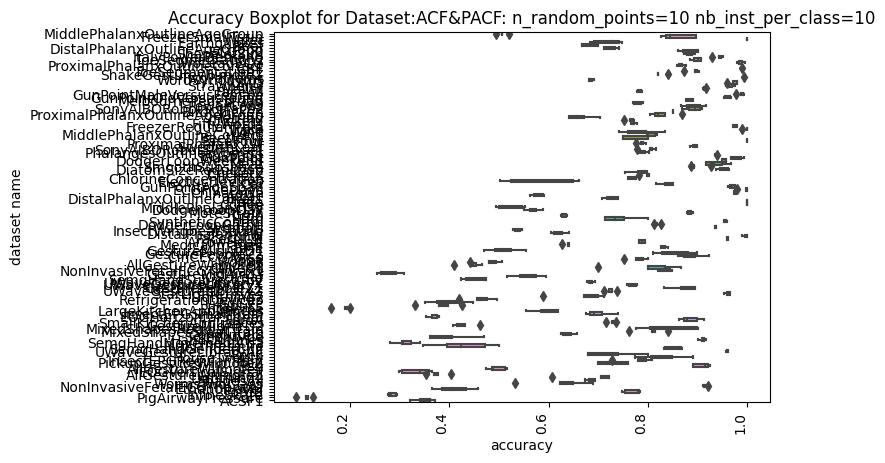

In [24]:
max_bx=max(df_result.accuracy)
min_bx=min(df_result.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=df_result, y='dataset_name', x='accuracy')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
#plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc/boxplot_acc_per_ds.png')

In [25]:
filter_param=concatenated_df[concatenated_df.classifier_name==hyperparameter]

In [26]:
stats = filter_param.groupby(['dataset_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
print(stats.round(2))

                    mean  count   std  ci95_interval
dataset_name                                        
ACSF1               0.35      5  0.02           0.02
Adiac               0.58      5  0.01           0.01
AllGestureWiimoteX  0.44      5  0.02           0.02
AllGestureWiimoteY  0.49      5  0.02           0.02
AllGestureWiimoteZ  0.38      5  0.02           0.02
...                  ...    ...   ...            ...
Wine                0.78      5  0.04           0.03
WordSynonyms        0.68      5  0.00           0.00
Worms               0.48      5  0.02           0.02
WormsTwoClass       0.63      5  0.06           0.05
Yoga                0.78      5  0.02           0.02

[128 rows x 4 columns]


In [27]:
# create a pivot table with the mean of score by hyperparameter
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
#t_score_by_method=score_by_method.transpose()[[hyperparameter,"SAST"]].round(2)
#t_score_by_method=score_by_method.transpose().round(2)
t_score_by_method.iloc[0:25,:]


classifier_name,RDST_RSAST_TRAIN_TEST,RSAST,Rocket_RSAST_TRAIN_TEST
dataset_name,,,
ACSF1,0.918000,0.350000,0.890000
Adiac,0.727877,0.576982,0.784143
AllGestureWiimoteX,0.768857,0.444571,0.779429
AllGestureWiimoteY,0.758857,0.494857,0.768857
AllGestureWiimoteZ,0.710286,0.375143,0.758000
ArrowHead,0.859429,0.788571,0.806857
BME,0.993333,0.832000,1.000000
Beef,0.833333,0.680000,0.820000
BeetleFly,0.950000,0.770000,0.900000


In [28]:
t_score_by_method.iloc[25:49,:]

classifier_name,RDST_RSAST_TRAIN_TEST,RSAST,Rocket_RSAST_TRAIN_TEST
dataset_name,,,
DodgerLoopDay,0.635000,0.567500,0.612500
DodgerLoopGame,0.862319,0.818841,0.846377
DodgerLoopWeekend,0.978261,0.953623,0.975362
ECG200,0.898000,0.880000,0.920000
ECG5000,0.945511,0.937289,0.947289
ECGFiveDays,0.997909,0.995354,1.000000
EOGHorizontalSignal,0.675138,0.369613,0.640884
EOGVerticalSignal,0.545304,0.333149,0.543646
Earthquakes,0.722302,0.717986,0.755396


In [29]:
t_score_by_method.iloc[49:75,:]

classifier_name,RDST_RSAST_TRAIN_TEST,RSAST,Rocket_RSAST_TRAIN_TEST
dataset_name,,,
GesturePebbleZ1,0.903488,0.870930,0.908140
GesturePebbleZ2,0.888608,0.854430,0.835443
GunPoint,1.000000,0.980000,1.000000
GunPointAgeSpan,0.996835,0.969620,0.996835
GunPointMaleVersusFemale,1.000000,0.987975,0.997468
GunPointOldVersusYoung,1.000000,0.961270,0.988571
Ham,0.712381,0.742857,0.714286
HandOutlines,0.950270,0.910270,0.945946
Haptics,0.576623,0.385065,0.525325


In [30]:
t_score_by_method.iloc[76:,:]

classifier_name,RDST_RSAST_TRAIN_TEST,RSAST,Rocket_RSAST_TRAIN_TEST
dataset_name,,,
MixedShapesSmallTrain,0.967588,0.807093,0.937814
MoteStrain,0.926358,0.884185,0.916933
NonInvasiveFetalECGThorax1,0.927532,0.833384,0.955725
NonInvasiveFetalECGThorax2,0.939746,0.915013,0.968448
OSULeaf,0.980165,0.559504,0.935537
OliveOil,0.886667,0.800000,0.926667
PLAID,0.956052,0.779888,0.892365
PhalangesOutlinesCorrect,0.807459,0.789977,0.833566
Phoneme,0.339241,0.187447,0.277637


In [31]:
t_score_by_method.describe().round(2)

classifier_name,RDST_RSAST_TRAIN_TEST,RSAST,Rocket_RSAST_TRAIN_TEST
count,128.00,128.00,128.00
mean,0.86,0.75,0.85
std,0.14,0.21,0.15
min,0.34,0.11,0.28
25%,0.77,0.64,0.78
50%,0.90,0.79,0.90
75%,0.98,0.90,0.97
max,1.00,1.00,1.00


In [32]:
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=t_score_by_method.transpose()#[[hyperparameter,"SAST"]].round(2)

In [33]:
for methods in t_score_by_method.columns.drop(hyperparameter):
    print("method: "+methods+" vs "+hyperparameter)
    total_wins=len(t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("winning RSAST: "+str(total_wins))
    total_loss=len(t_score_by_method[0>(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("losse RSAST: "+str(total_loss))
    total_draws=len(t_score_by_method[0==(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("draws: "+str(total_draws))

method: RDST_RSAST_TRAIN_TEST vs RSAST
winning RSAST: 5
losse RSAST: 111
draws: 12
method: Rocket_RSAST_TRAIN_TEST vs RSAST
winning RSAST: 5
losse RSAST: 114
draws: 9


In [34]:
#wins of RSAST
#t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))].index

In [35]:
#concatenated_df['classifier_name']=concatenated_df['classifier_name'].str.split('_').str[0]

In [36]:
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'], aggfunc='var').round(4)

,accuracy
classifier_name,
RDST_RSAST_TRAIN_TEST,0.0203
RSAST,0.0432
Rocket_RSAST_TRAIN_TEST,0.0227


In [37]:
#concatenated_df['classifier_name']=concatenated_df['classifier_name'].str.split('_').str[0]
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
score_by_method

classifier_name,RDST_RSAST_TRAIN_TEST,RSAST,Rocket_RSAST_TRAIN_TEST
dataset_name,,,
ACSF1,0.918000,0.350000,0.890000
Adiac,0.727877,0.576982,0.784143
AllGestureWiimoteX,0.768857,0.444571,0.779429
AllGestureWiimoteY,0.758857,0.494857,0.768857
AllGestureWiimoteZ,0.710286,0.375143,0.758000
...,...,...,...
Wine,0.918519,0.777778,0.818519
WordSynonyms,0.746395,0.684953,0.751097
Worms,0.688312,0.480519,0.729870


/tmp/ipykernel_7429/4029821119.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_7429/4029821119.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


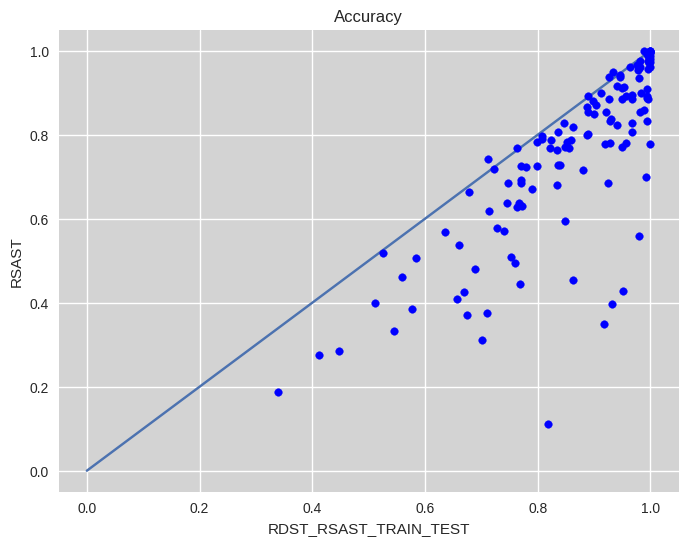

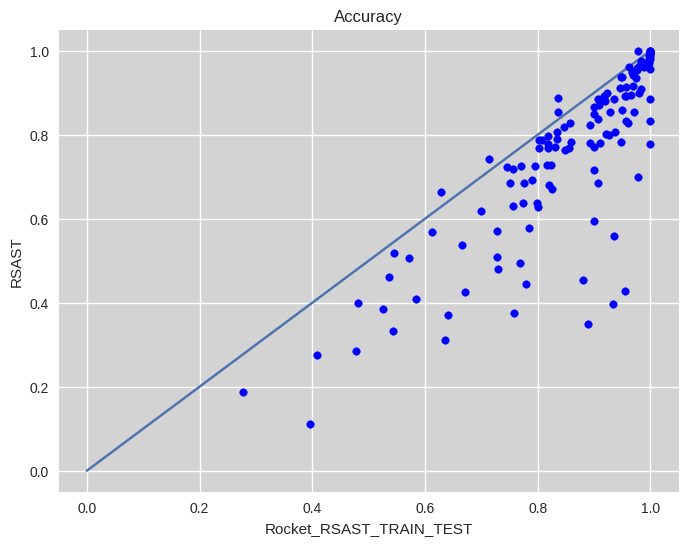

In [38]:
for method in score_by_method.columns.drop(hyperparameter):
    y=score_by_method[hyperparameter]
    x=score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel('RSAST')
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/RSASTvs'+method+'.png')


In [39]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points=10 nb_inst_per_class=10
dataset_name,
ACSF1,0.030428
Adiac,37.744124
AllGestureWiimoteX,0.009497
AllGestureWiimoteY,0.009813
AllGestureWiimoteZ,0.009733
...,...
Wine,0.262070
WordSynonyms,36.278904
Worms,0.009722


#### Generate CD Diagram comparison

In [40]:
pv_all=pd.pivot_table(concatenated_df,index='dataset_name',values='accuracy',aggfunc="count")
ds_complete=pv_all[pv_all.accuracy==max(pv_all.accuracy)].reset_index().dataset_name.unique()
ds_complete
concatenated_df=concatenated_df[concatenated_df.dataset_name.isin(ds_complete)]

In [41]:
#concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'], aggfunc='count')

,accuracy
classifier_name,
RDST_RSAST_TRAIN_TEST,128
RSAST,128
Rocket_RSAST_TRAIN_TEST,128


In [42]:
concatenated_df.classifier_name.unique()

array(['RDST_RSAST_TRAIN_TEST', 'Rocket_RSAST_TRAIN_TEST', 'RSAST'],
      dtype=object)

In [43]:

from cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, fname='images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

{0: 'RSAST', 1: 'Rocket_RSAST_TRAIN_TEST', 2: 'RDST_RSAST_TRAIN_TEST'}
[1, 2]


In [44]:
df_perf["classifier_name"].unique()

array(['RDST_RSAST_TRAIN_TEST', 'RSAST', 'Rocket_RSAST_TRAIN_TEST'],
      dtype=object)

In [45]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

,0
RSAST,2.886719
Rocket_RSAST_TRAIN_TEST,1.597656
RDST_RSAST_TRAIN_TEST,1.515625


In [47]:
uca_ds=pd.read_excel("DataSetsUCLASummary.xlsx")

uca_ds.columns

Index(['USED SAST', 'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS',
       'ID', 'Name', 'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [49]:
concatenated_df=concatenated_df.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
concatenated_df.columns

Index(['dataset_name', 'accuracy', 'classifier_name', 'time', 'USED SAST',
       'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS', 'ID', 'Name',
       'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [50]:
acc_per_type=pd.pivot_table(concatenated_df, values="accuracy", index=["dataset_name","Type",'classifier_name'])
#acc_per_type=concatenated_df
acc_per_type=acc_per_type.reset_index()

In [51]:
max_bx=max(acc_per_type.accuracy)
min_bx=min(acc_per_type.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=acc_per_type, y='Type', x='accuracy', hue ='classifier_name')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc_per_type/boxplot_acc_per_type.png')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because